In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

In [2]:
random_state("rng_states/experiment4.npy")

In [3]:
S = [1.] * 12
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

rectangles = [((1.6, 2.), (7., 3.)), ((-7., 2.), (-0.4, 3.)), ((0.1, 2.), (1.1, 3.)),
              ((-7., 4.5), (-1.3, 6.)), ((-0.8, 5.), (7., 6.5))]
rectangle_vs = [(-0.2, 0.)] * 3 + [(0.2, 0.)] * 2
target = (3., 8.)
target_v = (-0.5, 0.)
targets = target_with_velocity(target, target_v, T)
rectangle_lists = rectangles_with_velocity(rectangles, rectangle_vs, T)
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangles)

n = 600
alpha_inf = 0.8
n_immigrants = 300
eta_c = 3.
eta_m = 10.
p_c = 0.9
p_m = 0.02
num_iterations_init = 200
num_iterations = 120

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 0, #feasible: 139, best: [18.39430305], #infeasible: 461, best: [4.2808389 1.       ]
Iteration 20, #feasible: 120, best: [9.33413567], #infeasible: 480, best: [0.00140035 1.        ]
Iteration 40, #feasible: 120, best: [5.32166163], #infeasible: 480, best: [5.72216165e-04 1.00000000e+00]
Iteration 60, #feasible: 120, best: [0.60867202], #infeasible: 480, best: [3.83902624e-07 1.00000000e+00]
Iteration 80, #feasible: 120, best: [0.02619938], #infeasible: 480, best: [3.27426564e-08 1.00000000e+00]
Iteration 100, #feasible: 120, best: [0.00328671], #infeasible: 480, best: [2.76281193e-09 1.00000000e+00]
Iteration 120, #feasible: 120, best: [0.00012172], #infeasible: 480, best: [3.36551407e-10 1.00000000e+00]
Iteration 140, #feasible: 120, best: [0.00011547], #infeasible: 480, best: [2.2839583e-10 1.0000000e+00]
Iteration 160, #feasible: 120, best: [0.00010373], #infeasible: 480, best: [4.41918782e-12 1.00000000e+00]
Iteration 180, #feasible: 120, best: [9.71843332e-05], #infeas

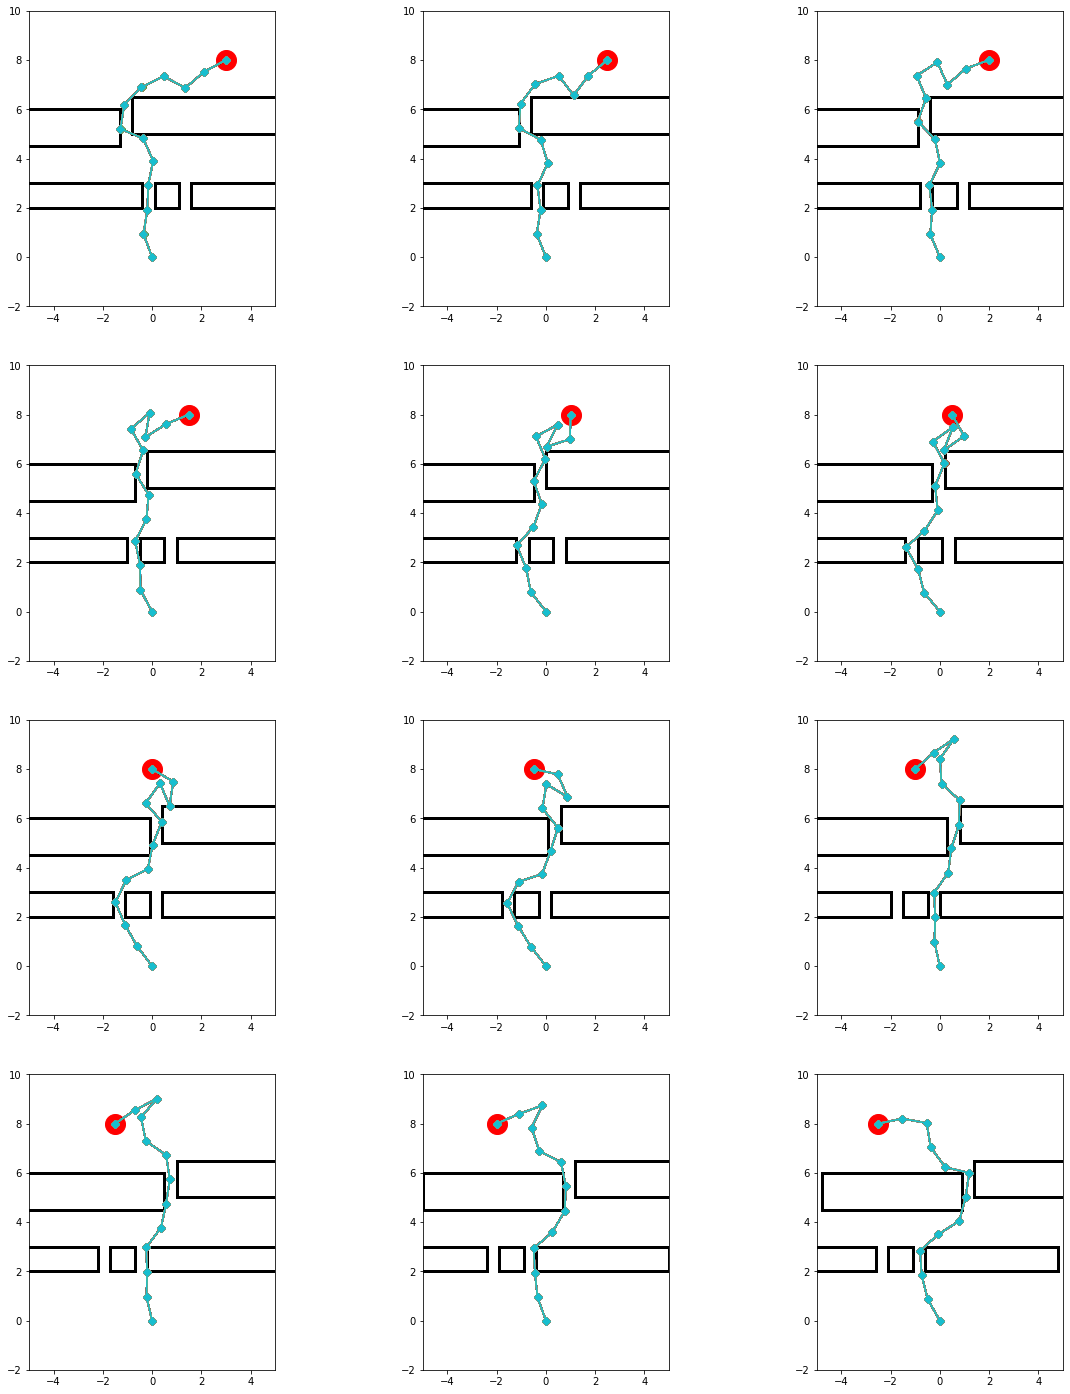

In [4]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)

draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T),
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

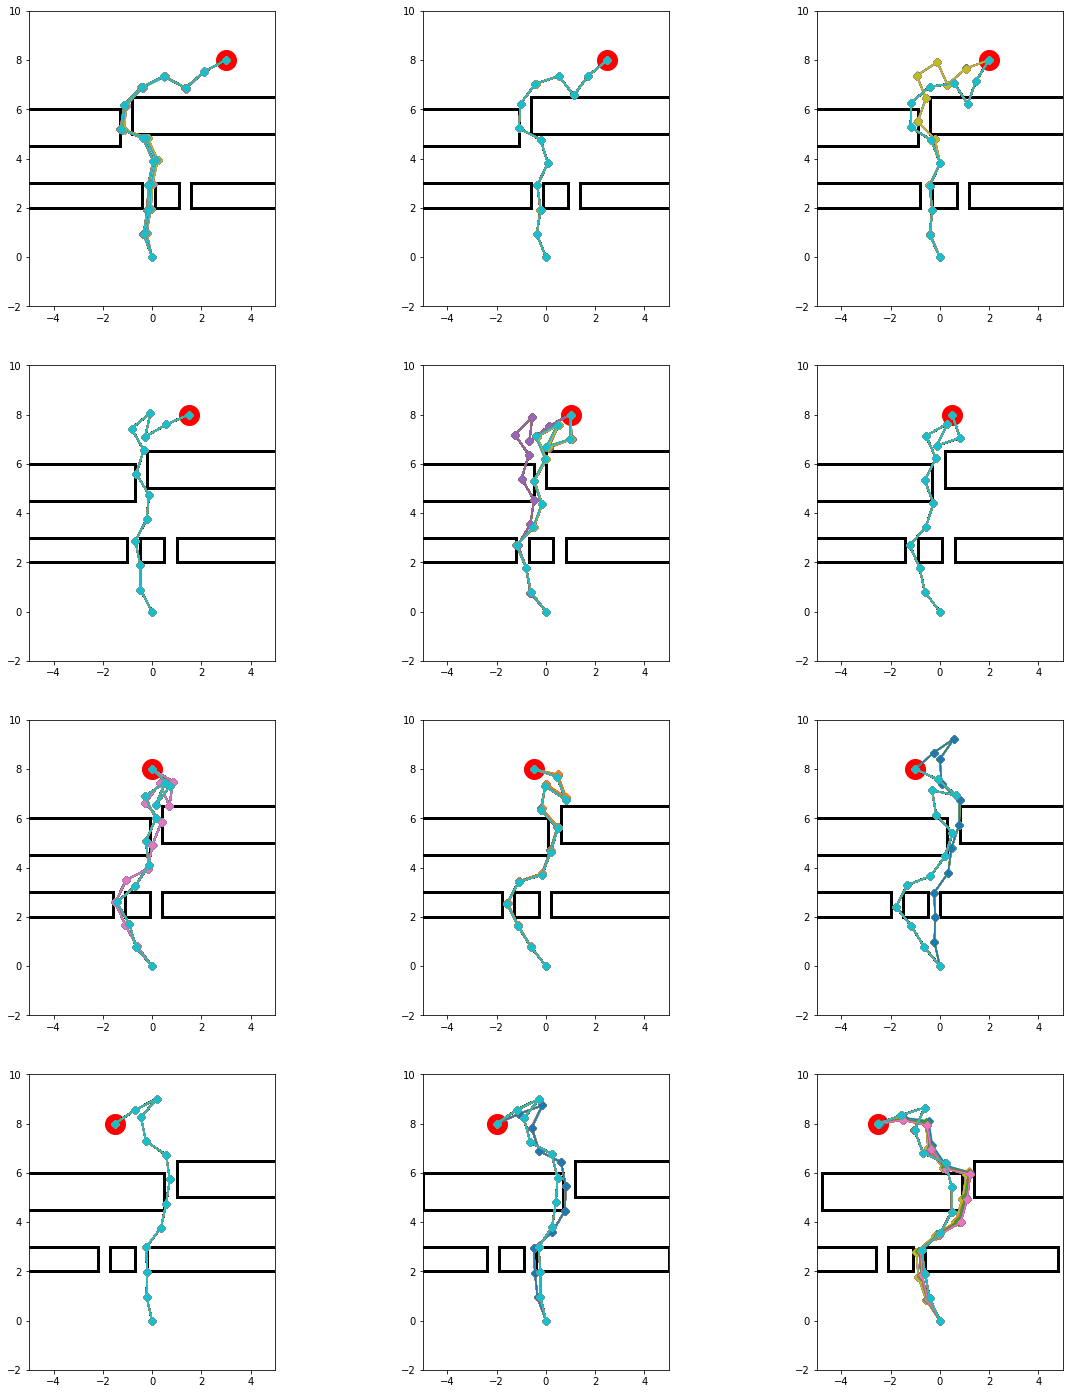

In [5]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)

draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T),
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))